# Eksplorasi Dataset

In [71]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import itertools

In [72]:
fields = ['created_at', 'username', 'name', 'tweet']
df = pd.read_csv('./data/PresidenLanggarKonstitusi.csv', skipinitialspace=True, usecols=fields, parse_dates=['created_at'])
df.head()

,created_at,username,name,tweet
0,2021-06-12 18:47:40,ulamaaswaja,Pecinta Ulama Aswaja,Rezim ini suka kali malaki dan mempersulit rak...
1,2021-06-12 18:46:42,gotham_cty0,Gotham,@Hail_Indonesia @7thbali @B_dzoel @Wanitadesap...
2,2021-06-12 18:45:59,gotham_cty0,Gotham,@B_dzoel @Hail_Indonesia @7thbali @Wanitadesap...
3,2021-06-12 18:45:57,lollynadh,Ecky,Miris ga liat keadaan negeri kita... Miris gaa...
4,2021-06-12 18:45:23,melati152,Melati15,@Adinda_Zahran1 @zombiebrazil Halooo... DPR ma...


In [73]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'

def tweet_cleaner(text):
    stripped = re.sub(combined_pat, '', text)
    stripped = re.sub(www_pat, '', stripped)
    stripped = re.sub('^b[\'"](RT)? ?:?|x[0123456789abcdef]+', '', stripped)
    lower_case = stripped.lower()
    lower_case = lower_case.strip()
    lower_case = lower_case.replace('\\n', ' ')
    lower_case = lower_case.replace('\\', '')

    return lower_case

In [74]:
clean_tweets = []
for i in range(0, len(df)):
  clean_tweets.append(tweet_cleaner(df['tweet'][i]))

df['tweet'] = clean_tweets
df.head()

,created_at,username,name,tweet
0,2021-06-12 18:47:40,ulamaaswaja,Pecinta Ulama Aswaja,rezim ini suka kali malaki dan mempersulit rak...
1,2021-06-12 18:46:42,gotham_cty0,Gotham,😭😭😭😭 ingat banggg#presidenlanggarkonstitusi #p...
2,2021-06-12 18:45:59,gotham_cty0,Gotham,passtii #presidenlanggarkonstitusi #presidenla...
3,2021-06-12 18:45:57,lollynadh,Ecky,miris ga liat keadaan negeri kita... miris gaa...
4,2021-06-12 18:45:23,melati152,Melati15,halooo... dpr masih kaaan... lihat tuuh 👇 #pre...


In [75]:
username_group = df.groupby('username').groups
print('Jumlah akun yang didapat ',len(username_group))
username_group

Jumlah akun yang didapat  457


{'01farindo': [270], '1001titisan': [185], '1febri': [407, 408, 410], '1ni_embun__': [1023], '212jalurgaza': [197], '2_bongkar': [1063, 1197], '555akhmad': [550, 592, 599, 708, 1053, 1142, 1872, 1874, 2176, 2181, 2188, 2194], '5h0n4': [2081], '60dy1o710n': [1960, 1967, 1968, 1971, 1972, 1976], '73n0n9': [1668, 1675, 1676, 1683, 1692, 1694, 1695, 1746, 1750, 1753, 1758, 1760, 1763, 1765, 1769], '7thbali': [104, 109, 112, 117, 118, 794, 805, 812, 818, 824, 827, 830, 833, 836, 838, 991, 992, 1001, 1007, 1008, 1017, 1026, 1034, 1906, 1925, 2109, 2147, 2151, 2175, 2178], '9lentertainment': [622], '__kangmasmo3__': [909], '_adityudhistira': [15], '_bellapeter': [1316, 1321, 1395, 1465], '_srikandigalau_': [220], '_tan_mudo_': [1816, 1857, 1869], 'a7i2s': [140, 145, 147], 'a_syahrulkhair': [175], 'abahnasaf3': [2103, 2115, 2125, 2225, 2229], 'abdulla3new': [588], 'abureal2': [1458], 'abuyumn63495544': [48], 'aceljuju': [515], 'achmadafdhal': [994], 'acp_tukang': [371, 376], 'adecand00351122':

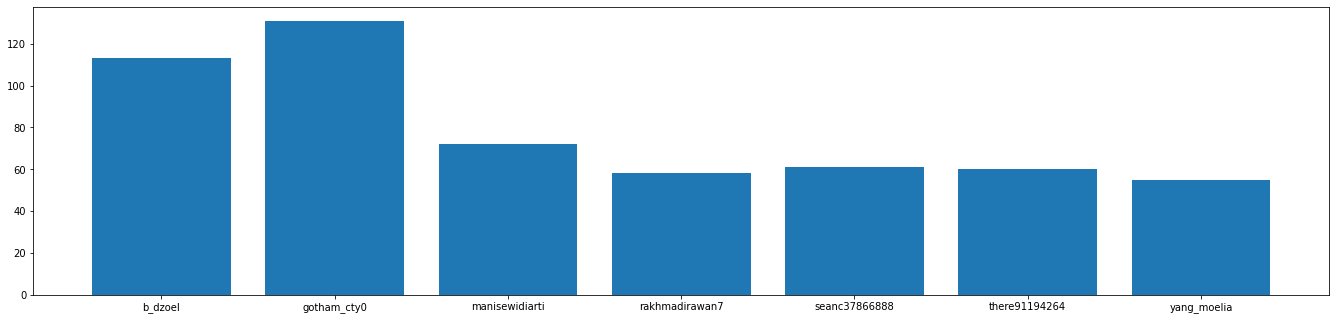

In [76]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])

username = []
total_tweets = []

for key,value in username_group.items():
    if len(value)>50:
        username.append(key)
        total_tweets.append(len(value))
        
    
ax.bar(username,total_tweets)
plt.show()

{1: 283, 2: 53, 3: 30, 4: 9, 5: 9, 6: 6, 7: 11, 8: 6, 9: 5, 10: 3, 11: 4, 12: 2, 14: 2, 15: 1, 16: 2, 17: 1, 18: 2, 20: 2, 21: 1, 26: 1, 28: 1, 29: 1, 30: 3, 32: 2, 36: 2, 38: 1, 41: 2, 42: 1, 43: 1, 47: 2, 48: 1, 55: 1, 58: 1, 60: 1, 61: 1, 72: 1, 113: 1, 131: 1}


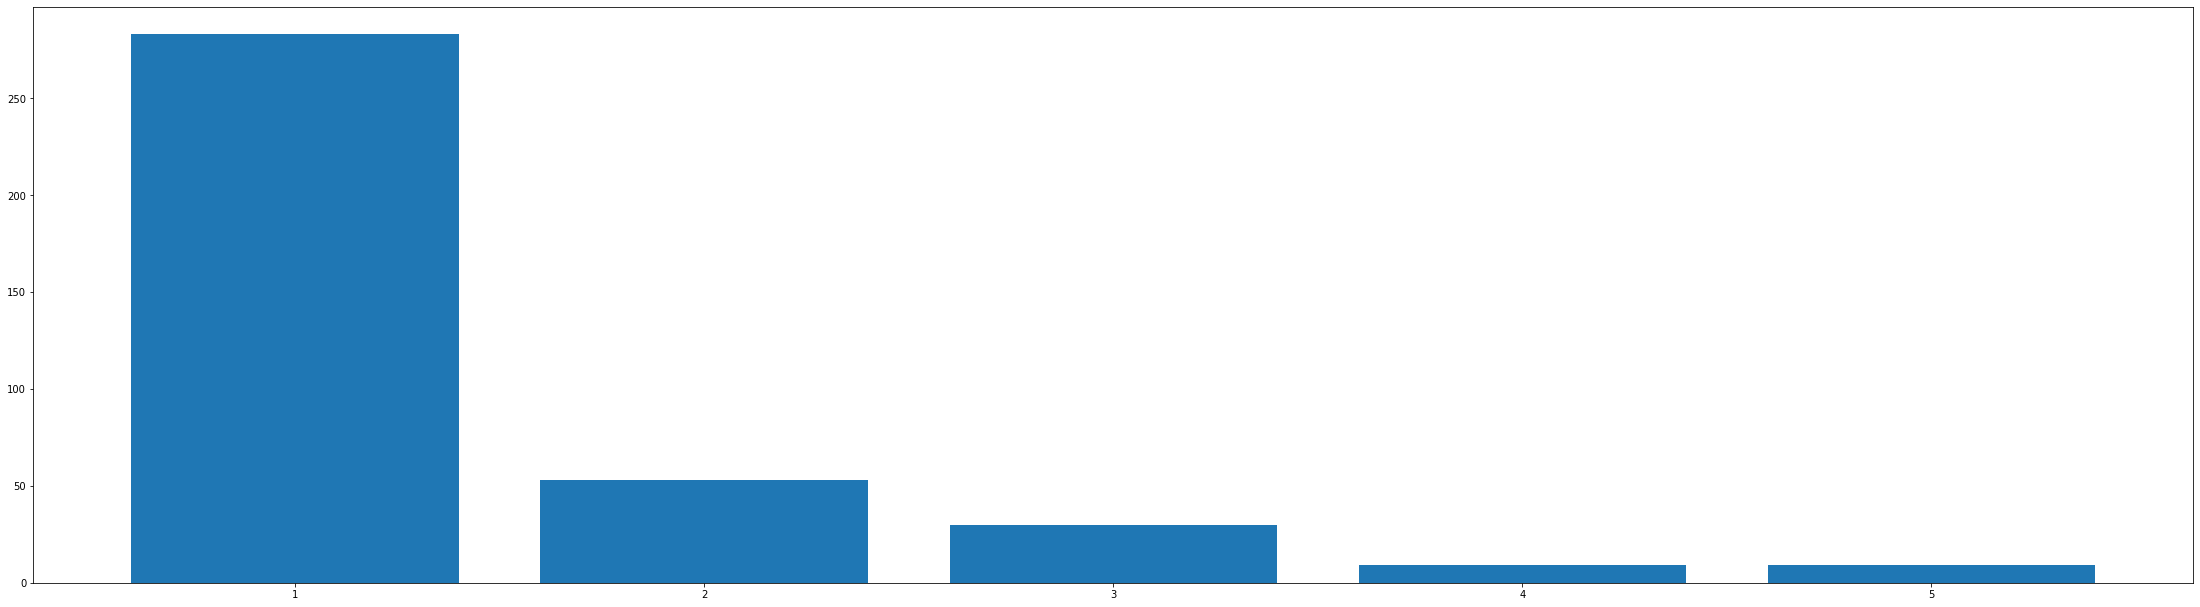

In [77]:
length_dict = {key: len(value) for key, value in username_group.items()}
user_by_tweets = Counter(length_dict.values())

user_by_tweets = sorted(user_by_tweets.items())
user_by_tweets = dict((key, value) for key, value in user_by_tweets)
print(user_by_tweets)

user_by_tweets = dict(itertools.islice(user_by_tweets.items(), 5))

fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
plt.bar(range(len(user_by_tweets)), list(user_by_tweets.values()), align='center')
plt.xticks(range(len(user_by_tweets)), list(user_by_tweets.keys()))
plt.show()

In [84]:
df

,created_at,username,name,tweet
0,2021-06-12 18:47:40,ulamaaswaja,Pecinta Ulama Aswaja,rezim ini suka kali malaki dan mempersulit rak...
1,2021-06-12 18:46:42,gotham_cty0,Gotham,😭😭😭😭 ingat banggg#presidenlanggarkonstitusi #p...
2,2021-06-12 18:45:59,gotham_cty0,Gotham,passtii #presidenlanggarkonstitusi #presidenla...
3,2021-06-12 18:45:57,lollynadh,Ecky,miris ga liat keadaan negeri kita... miris gaa...
4,2021-06-12 18:45:23,melati152,Melati15,halooo... dpr masih kaaan... lihat tuuh 👇 #pre...
...,...,...,...,...
2254,2017-02-13 00:09:41,heriboedi,#MitraHansip,sejarah mencatat di indonesia ada #gubernurter...
2255,2017-02-13 00:07:18,heriboedi,#MitraHansip,"#memilihpemimpin jgn yg terdakwa, apalagi dia ..."
2256,2017-02-12 19:27:05,blessvon16,Sa Metaru Desh,#presidenlanggarkonstitusi
2257,2017-02-12 12:07:32,hananyusron,#BeasiswaNTBKeSudan,#presidenlanggarkonstitusi #presidenlanggarko...
